In [6]:
import pandas as pd
import os

def prepare_smartphone_data(file_path: str):
    """
    Load and clean the smartphone data for visualization

    Steps:
        1. Keep only the columns needed downstream
        2. Drop rows missing required fields: 'battery_capacity' and 'os'
        3. Convert 'price' from cents to dollars (float)
    
    Args:
        file_path: Path to the CSV file containing raw smartphone data
    
    Returns:
        A cleaned `pandas.DataFrame` with selected columns and a transformed `price` column expressed in dollarts
    
    Raises:
        FileNotFoundError: If `file_path` does not point to an existing fike
        ValueError: If any expected column is mising from the input data
    
    Example:
        >>> df = prepare_smartphone_data('smartphones.csv')
        >>> df.head()
    """

    if not os.path.isfile(file_path):
        raise FileNotFoundError(f'Data file not found {file_path}')
    
    df = pd.read_csv(file_path)

    required_cols = [
        "brand_name",
        "os",
        "price",
        "avg_rating",
        "processor_speed",
        "battery_capacity",
        "screen_size"
    ]

    missing = [col for col in required_cols if col not in df.columns]

    if missing:
        raise ValueError(f'Missing expected columns: {missing}')
    
    # Use a pipeline that avoids chained-assignment warnings and is easy to read
    cleaned = (
        df.loc[:, required_cols].dropna(subset=['battery_capacity', 'os']).assign(price = lambda d: pd.to_numeric(d['price'], errors='coerce').div(100.0))
    )

    return cleaned

# Call the function
cleaned_data = prepare_smartphone_data('smartphones.csv')
print(cleaned_data)

    brand_name       os    price  avg_rating  processor_speed  \
0        apple      ios   389.99         7.3             2.65   
1        apple      ios   469.99         7.5             2.65   
2        apple      ios  1099.00         7.7             2.65   
11       apple      ios   629.99         7.9             3.22   
12       apple      ios   729.99         7.9             3.22   
..         ...      ...      ...         ...              ...   
975     xiaomi  android   139.99         7.5             2.30   
976     xiaomi  android   144.39         7.7             2.30   
977     xiaomi  android   164.90         8.0             2.30   
978        zte  android   199.99         8.2             3.20   
979        zte  android   619.90         8.9             3.00   

     battery_capacity  screen_size  
0              3110.0         6.10  
1              3110.0         6.10  
2              3500.0         6.50  
11             3240.0         6.10  
12             3240.0         6.10

<Axes: title={'center': 'Processor Speed vs. Price'}, xlabel='Processor Speed', ylabel='Price ($)'>

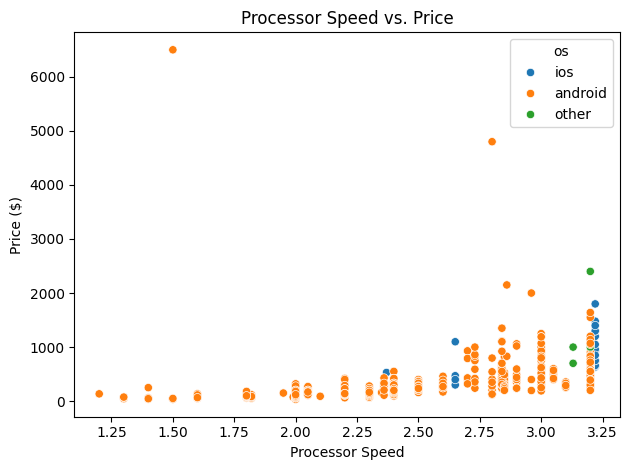

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def column_to_label(column_name):
    """
    Convert a DataFrame column name into a human-readable plot label.

    :param column_name: original column name
    :return: label string for plotting
    """

    if not isinstance(column_name, str):
        raise TypeError('column_name must be a string')
    
    return column_name.replace('_', ' ').title()


def visualize_versus_price(cleaned_data: pd.DataFrame, x: str):
    """
    Plot a scatter of x vs price, colored by OS.

    Uses seaborn to show the relationship between a chosen feature (x) and `price`. Labels and title are generated via 'column_to_label' to avoid duplicated formatting logic

    :param cleaned_data: pandas DataFrame containing at least columns [x, 'price', 'os']
    :param x: column name to plot on the x-axis (str)
    :return: the matplotlib axes object

    """

    missing = {c for c in [x, 'price', 'os'] if c not in cleaned_data.columns}

    if missing:
        raise KeyError(f'Missing required columns: {sorted(missing)}')
    
    # Clean the NA
    plot_df = cleaned_data[[x, 'price', 'os']].dropna()

    # Build the labels once
    x_label = column_to_label(x)
    y_label = f'{column_to_label('price')} ($)'
    title = f'{x_label} vs. {column_to_label('price')}'

    # Create the plot
    ax = sns.scatterplot(data=plot_df, x=x, y='price', hue='os')

    # Apply labels/title 
    ax.set(xlabel=x_label, ylabel=y_label, title=title)
    plt.tight_layout()

    return ax

# Call the visualize_versus_price function
visualize_versus_price(cleaned_data, 'processor_speed')

In [15]:
import pytest
import ipytest

ipytest.config.rewrite_asserts = True
__file__ = "notebook2.ipynb"


# Create a clean DataFrame fixture
@pytest.fixture()
def clean_smartphone_data():
    return prepare_smartphone_data("smartphones.csv")


def test_nan_values(clean_smartphone_data):
    """Test that there are no NaN values in 'battery_capacity' or 'os'."""
    df = clean_smartphone_data
    assert df["battery_capacity"].isna().sum() == 0
    assert df["os"].isna().sum() == 0


ipytest.run("-qq")


.                                                                                            [100%]


<ExitCode.OK: 0>